### Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading Data

In [2]:
df = pd.read_csv("Attrition_Final.csv")

In [3]:
df.head()

Age Attrition  StackRate  Department  JobRole  DistanceFromHome  Education  \
0   27        No         51           1        1              11.0          1   
1   23        No         68           1        1               4.0          1   
2   22        No         68           1        1              25.0          1   
3   25        No         81           1        1              17.0          1   
4   23        No         55           1        1              17.0          1   

   Gender  JobLevel  Technical  TotalWorkingYears  SpaChange  PocChange  \
0       0         0          1                  3          1          1   
1       1         0          1                  1          1          1   
2       0         0          0                  0          1          1   
3       0         0          1                  1          1          1   
4       1         0          1                  1          1          1   

   ShiftChange  CareerProgression  EmployeeNumber  
0            1                  0        17000012  
1            1                  0        17000036  
2            1                  0        17000045  
3            1                  0        17000054  
4            1                  0        17000057

In [4]:
df.drop("EmployeeNumber", axis=1, inplace = True)

In [5]:
df.head()

Age Attrition  StackRate  Department  JobRole  DistanceFromHome  Education  \
0   27        No         51           1        1              11.0          1   
1   23        No         68           1        1               4.0          1   
2   22        No         68           1        1              25.0          1   
3   25        No         81           1        1              17.0          1   
4   23        No         55           1        1              17.0          1   

   Gender  JobLevel  Technical  TotalWorkingYears  SpaChange  PocChange  \
0       0         0          1                  3          1          1   
1       1         0          1                  1          1          1   
2       0         0          0                  0          1          1   
3       0         0          1                  1          1          1   
4       1         0          1                  1          1          1   

   ShiftChange  CareerProgression  
0            1                  0  
1            1                  0  
2            1                  0  
3            1                  0  
4            1                  0

### Reassign Target

In [6]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

### Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [7]:
#split dataset in features and target variable
feature_cols = ['Age', 'StackRate', 'Department', 'JobRole','DistanceFromHome','Education','Gender','JobLevel','Technical','TotalWorkingYears','SpaChange']
X = df[feature_cols] # Features
y = df.Attrition # Target variable

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [8]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1 ) # 70% training and 30% test

#X_train.shape

#X_test.shape

#y_train.shape

#y_test.shape

### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [9]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer

clf = clf.fit(X_train, y_train)

#Predict the response for test dataset

y_pred = clf.predict(X_test)

#y_pred

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [10]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7112676056338029


Well, you got a classification rate of 70.89%, considered as good accuracy. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

### Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

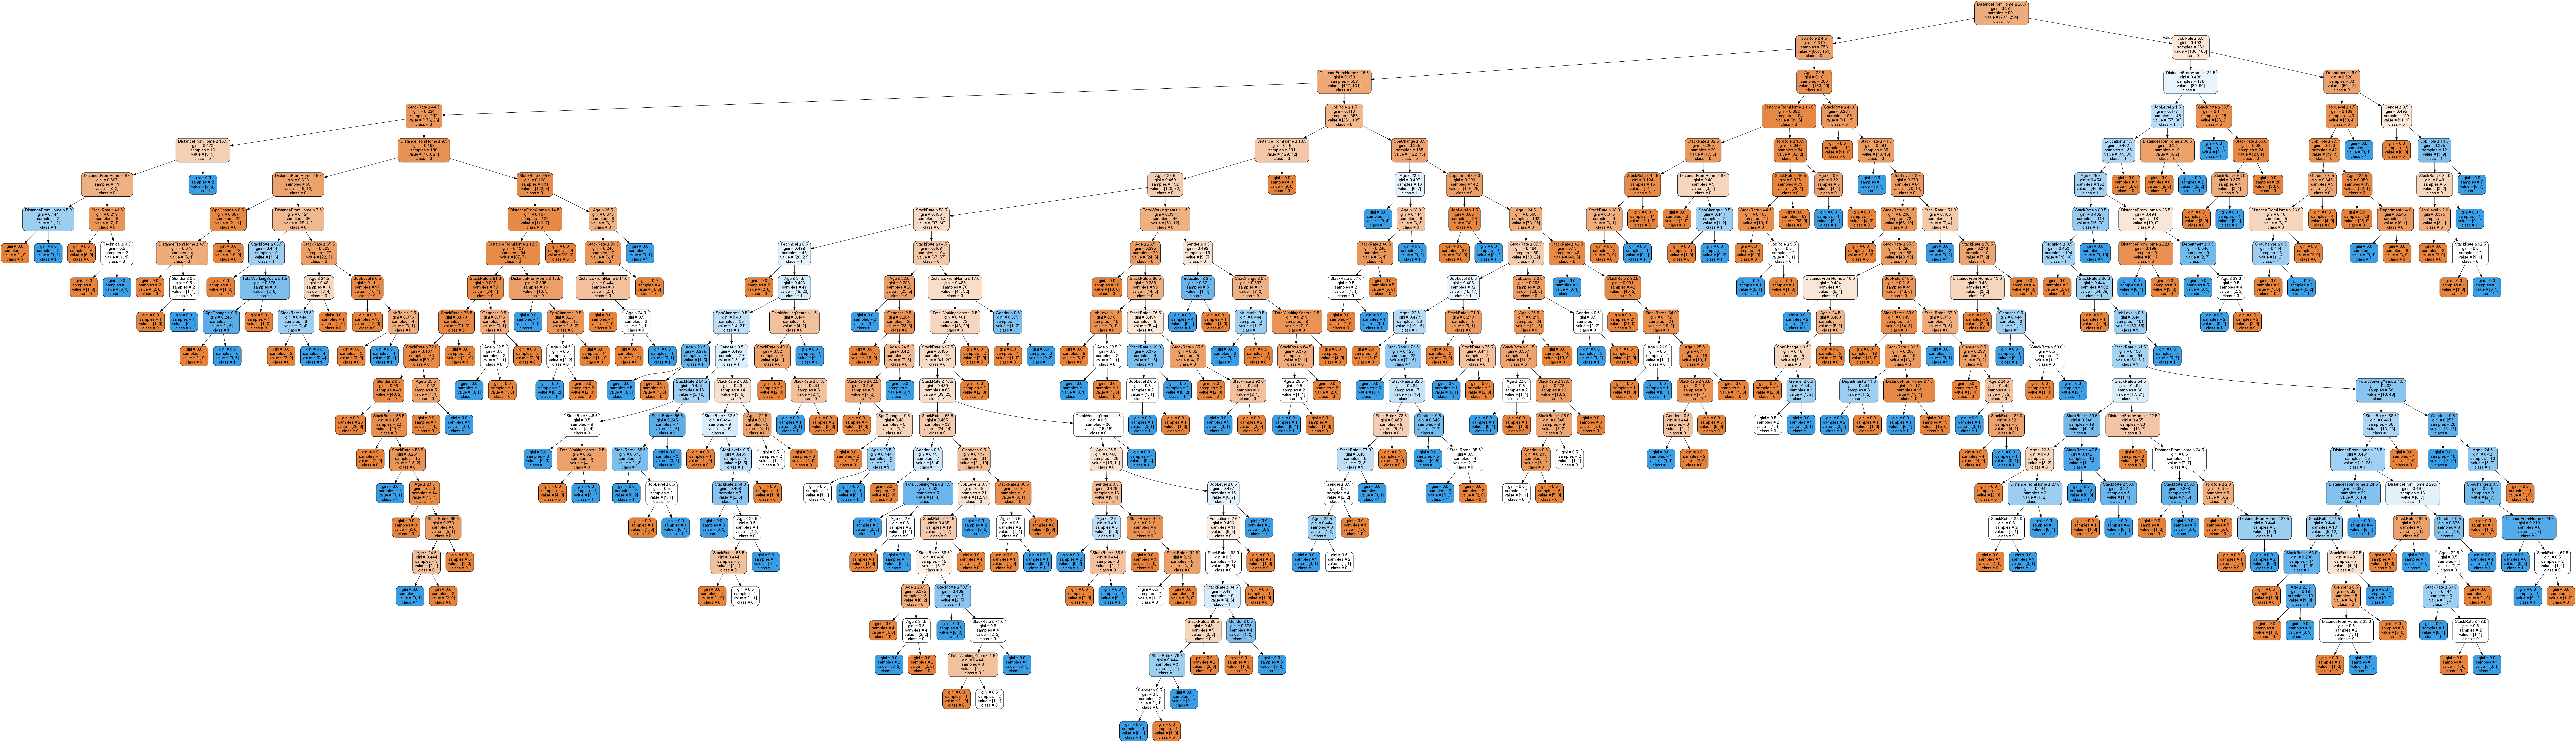

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

### Optimizing Decision Tree Performance

criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=11)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7206572769953051


Well, the classification rate increased to 72.30%, which is better accuracy than the previous model.

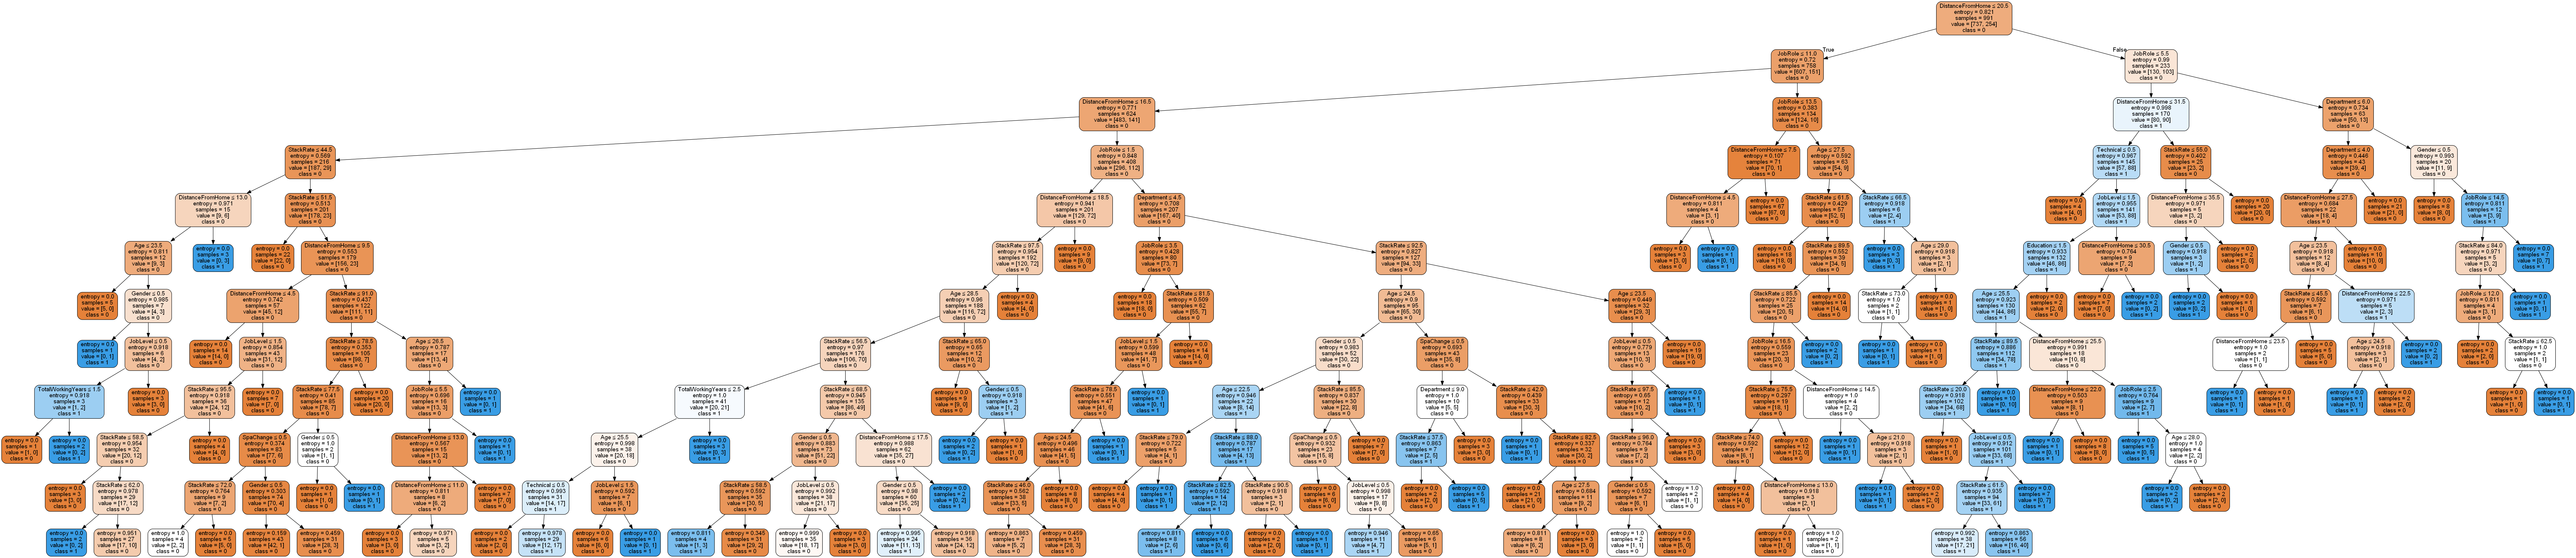

In [42]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

### In the last step we are appending the predicted Attrition into the original data and computing the error in estimation for the test data.

In [49]:
import numpy as np
compare = pd.concat([X_test,y_test],1)
compare['Predicted'] = np.round(y_pred,1)
compare['Prediction_Error'] = compare['Attrition'] - compare['Predicted']
compare.head(20)

Age  StackRate  Department  JobRole  DistanceFromHome  Education  \
309    22         68           1        1              17.0          1   
37     25         72           1        1              17.0          1   
111    24         67           1        1              15.0          1   
1084   25         65           1        1              22.0          1   
1157   25         49           1        1              17.0          1   
1079   23         74           1        1              17.0          1   
682    28         67           1        1              12.0          1   
607    24         76           6        4              17.0          1   
321    25         48           5       16              12.0          1   
1119   27         71           5       16              28.0          1   
579    23         99           6        4              20.0          1   
589    26         90           6        4               6.0          1   
929    26         43           3        4               9.0          1   
1265   23         60           6        4              17.0          1   
496    23         68           1        1              25.0          1   
516    27         88           1        1              15.0          1   
952    21         47           3        4              17.0          1   
167    24         65           2        7              17.0          1   
943    25         98           3        4              17.0          1   
1112   24         74           6        4              22.0          1   

      Gender  JobLevel  Technical  TotalWorkingYears  SpaChange  Attrition  \
309        0         0          1                  1          1          0   
37         1         0          1                  1          1          0   
111        0         0          1                  1          1          0   
1084       0         0          1                  1          1          1   
1157       1         0          1                  1          1          1   
1079       0         0          1                  2          1          1   
682        1         1          1                  1          1          0   
607        0         0          1                  1          1          1   
321        1         0          1                  1          1          0   
1119       0         0          1                  1          1          1   
579        0         0          1                  1          1          0   
589        1         1          1                  1          1          0   
929        0         0          1                  1          1          0   
1265       1         0          1                  1          1          1   
496        1         1          1                  1          1          0   
516        1         0          1                  2          1          0   
952        1         0          1                  1          1          0   
167        0         0          1                  1          0          0   
943        1         0          1                  1          1          0   
1112       1         0          1                  1          1          1   

      Predicted  Prediction_Error  
309           0                 0  
37            0                 0  
111           0                 0  
1084          1                 0  
1157          1                 0  
1079          1                 0  
682           0                 0  
607           1                 0  
321           0                 0  
1119          0                 1  
579           0                 0  
589           0                 0  
929           1                -1  
1265          1                 0  
496           1                -1  
516           0                 0  
952           0                 0  
167           0                 0  
943           0                 0  
1112          1                 0

### Pros

Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm

### Cons

Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

### Conclusion

Here you covered a lot of details about Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on Attrition dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.